# **Data Merging Basics**
# Inner join
## First inner join

In [1]:
# Loading data
import pandas as pd
taxi_owners = 'https://assets.datacamp.com/production/repositories/5486/datasets/553cc8938e07068079df6215e5fcc8dbcd97b5ee/taxi_owners.p'
taxi_owners = pd.read_pickle(taxi_owners)

taxi_veh_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/fe902298c39602e2ed571c23351571c779838858/taxi_vehicles.p'
taxi_veh = pd.read_pickle(taxi_veh_url)

In [2]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [3]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))

print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [6]:
# Print the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


## Inner joins and number of rows returned

In [7]:
# Loading data
wards_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/87c16fd85c435ea10221932ebab27ffb6b232c74/ward.p'
wards = pd.read_pickle(wards_url)

census_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/c778c41d8b2f0d4cc6c842e95e0c650c7156c82c/census.p'
census = pd.read_pickle(census_url)

In [8]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

print(wards_census.shape)

(50, 9)


In [9]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [10]:
#In the ward column change '1' to '61'
wards.loc[wards['ward'] == '1', 'ward'] = '61'

In [11]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

print(wards_census.shape)

(49, 9)


In [12]:
# Change '1' to None in 'ward' col
census.loc[census['ward'] == '1', 'ward'] = None

# Merge the wards and census tables in the ward column
wards_census = wards.merge(census, on='ward')

print(wards_census.shape)

(49, 9)


# One-to-many relationships
## One-to-many merge

In [13]:
# Loading data
licenses_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/2a4d8e5d91f6f2b41477fa6ea81da91e4f09305e/licenses.p'
licenses = pd.read_pickle(licenses_url)

biz_owners_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/fc3c75b236ed090f487b044603c0f7ff6825d911/business_owners.p'
biz_owners = pd.read_pickle(biz_owners_url)

In [14]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df=licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


# Merging multiple DataFrames
## Total riders in a month

In [15]:
#Load data
cal_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/1ea02e46369e0e2a33942afb4b1c2dafcb37dd2c/cta_calendar.p'
cal = pd.read_pickle(cal_url)

ridership_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/959c2b739879663c56ecd96c0013a1407c57684c/cta_ridership.p'
ridership = pd.read_pickle(ridership_url)

stations_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/369630192d0a25d3f20417eaa3101e7c8bf0588f/stations.p'
stations = pd.read_pickle(stations_url)

In [16]:
# Merge the ridership and cal tables 
ridership_cal = ridership.merge(cal)

ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


In [17]:
# Merge the ridership, cal and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year', 'month', 'day']).merge(stations)

ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [18]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year', 'month', 'day']).merge(stations, on='station_id')

# Create a filter to ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) &
                   (ridership_cal_stations['day_type'] == 'Weekday') & 
                   (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


## Three table merge

In [19]:
# Load data
zip_demo_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/293c2b89092f6bcdb97d4d9e971c08183f09c30b/zip_demo.p'
zip_demo = pd.read_pickle(zip_demo_url)

In [20]:
# Merge licenses and zip 
licenses_zip_ward = licenses.merge(zip_demo, on='zip').merge(wards, on='ward')

In [21]:
# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                           income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           41307
Brendan Reilly             110215
Brian Hopkins               87143
Carlos Ramirez-Rosa         66246
Carrie M. Austin            38206
Chris Taliaferro            55566
Daniel "Danny" Solis        41226
David H. Moore              33304
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             33959
Gilbert Villegas            41307
Gregory I. Mitchell         24941
Harry Osterman              45442
Howard B. Brookins, Jr.     33304
James Cappleman             79565
Jason C. Ervin              41226
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          28024
Margaret Laurino            70122
Marty Quinn   

## One-to-many merge with multiple tables

In [22]:
# Load data
land_use_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/d9c181b64947bf60ddd9770bad424db3717272e9/land_use.p'
land_use = pd.read_pickle(land_use_url)

In [23]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = pd.merge(land_use, census, on='ward').merge(licenses, on='ward', suffixes=('_cen', '_lic'))

In [24]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], as_index=False).agg({'account':'count'})

In [25]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], ascending=(False, True, False))

In [26]:
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
46    7     51581      19       80
11   20     52372      15      123
0    10     51535      14      130
15   24     54909      13       98
6    16     51954      13      156


# **Merging Tables with Different Join Types**
# Left Join
## Counting missing rows with left join

In [27]:
# Load data
movies_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/81f8f3290520b0a9bdc6d77deaac87a9d298de46/movies.p'
movies = pd.read_pickle(movies_url)

financials_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/e8f6bb0393b96bad22d50e42d5a9db1bbb643aa8/financials.p'
financials = pd.read_pickle(financials_url)

In [28]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [29]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [30]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, how='left')

movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [31]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

print(number_of_missing_fin)

1574


## Enriching a dataset

In [32]:
# Load data
toy_story = movies[movies['title'].str.contains('Toy Story')]
toy_story.head() 

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [33]:
# Load data
taglines_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/f8931478a29a0b3caea914d08cc4a8689b9a0663/taglines.p'
taglines = pd.read_pickle(taglines_url)

taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [34]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, how='left', on='id')

print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [35]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, how='inner', on='id')

print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


# Other joins
## Right join to find unique movies

In [36]:
# Load data
genres_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/a2963ed7eaefdc5ca0ed74fb6520c7588d57bfd5/movie_to_genres.p'
genres = pd.read_pickle(genres_url)

In [37]:
scifi_movies = genres[genres['genre'].str.contains('Science Fiction')]
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [38]:
action_movies = genres[genres['genre'].str.contains('Action')]
action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [39]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, how='right', on='movie_id')
action_scifi.head()

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,95,Action,Science Fiction
3,106,Action,Science Fiction
4,154,Action,Science Fiction


In [40]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci'))
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,95,Action,Science Fiction
3,106,Action,Science Fiction
4,154,Action,Science Fiction


In [41]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only.head()

,movie_id,genre_act,genre_sci
277,19,NaN,Science Fiction
278,38,NaN,Science Fiction
279,62,NaN,Science Fiction
280,68,NaN,Science Fiction
281,74,NaN,Science Fiction


In [42]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [43]:
print(movies_and_scifi_only.shape)

(258, 7)


## Popular genres with right join

In [44]:
# Subet dataframe pop_movies
pop_movies = movies.sort_values('popularity', ascending=False)
pop_movies = pop_movies.head(10)
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [45]:
# Use right join to merge the genres and pop_movies tables
genres_movies = genres.merge(pop_movies, how='right', right_on='id', left_on='movie_id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

genre_count

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


<function matplotlib.pyplot.show>

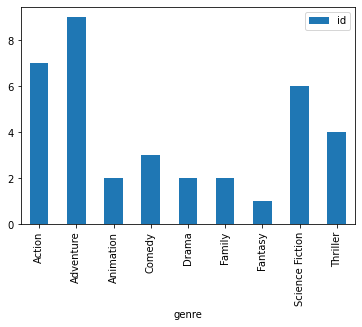

In [46]:
# Plot a bar chart of the genre_count
import matplotlib.pyplot as plt
genre_count.plot(kind='bar')
plt.show

## Using outer join to select actors

In [47]:
# Load data
casts_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/64dc93487604f68a9d51db160d888f3904c68da0/casts.p'
casts = pd.read_pickle(casts_url)

movie_casts = movies.merge(casts, on='id', how='outer')
movie_casts.head()

,id,title,popularity,release_date,movie_id,cast_id,character,gender,name
0,257,Oliver Twist,20.415572,2005-09-23,NaN,NaN,NaN,NaN,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN,NaN,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,NaN,NaN,NaN,NaN,NaN
3,9672,Infamous,3.680896,2006-11-16,NaN,NaN,NaN,NaN,NaN
4,12819,Alpha and Omega,12.300789,2010-09-17,849.0,27.0,Eirig,2.0,Bernard Archard


In [48]:
begins_id = movie_casts[movie_casts['title'] == 'Batman Begins']
returns_id = movie_casts[movie_casts['title'] == 'Batman Returns']

print(begins_id.loc[:, ['movie_id']])
print(returns_id.loc[:, ['id']])

      movie_id
3123      55.0
      id
652  364


In [49]:
begins_casts = movie_casts[movie_casts['movie_id'] == 55]
begins_actors = begins_casts.loc[:, ['id', 'character', 'name']]
begins_actors

,id,character,name
1738,268,Tía Luisa,Rosa María Bianchi
3123,272,Maru,Lourdes Echevarría
3283,261,Valeria,Goya Toledo
11804,258,Octavio,Gael García Bernal
11813,259,Susana,Vanessa Bauche
11815,262,Daniel,Alvaro Guerrero
11816,263,El Chivo,Emilio Echevarría
11821,264,Luis,Jorge Salinas
11822,265,Gustavo,Rodrigo Murray
11823,266,Jorge,Humberto Busto


In [50]:
# Load data
return_actors = pd.DataFrame({'character':['Oswald Cobblepot/The Penguin', 'Selina Kyle/Catwoman', 'Max Shreck', 'Alfred', 
                                           'Commissioner James Gordon', 'Mr. Cobblepot/ Penguins Father', 'Mayor',
                                           'Ice Princess', 'Mrs. Cobblepot/Penguins Mother', 'Bruce Wayne/Batman', 'Organ Grinder'],
                              'id':[518, 1160, 4690, 3796, 3798, 5129, 4776, 5130, 5131, 2232, 3418],
                              'name':['Danny DeVito', 'Michelle Pfeiffer', 'Christopher Walken', 'Michael Gough', 'Pat Hingle', 
                                      'Paul Reubens', 'Michael Murphy', 'Cristi Conaway', 'Diane Salinger', 
                                      'Michael Keaton', 'Vincent Schiavelli']})
return_actors

,character,id,name
0,Oswald Cobblepot/The Penguin,518,Danny DeVito
1,Selina Kyle/Catwoman,1160,Michelle Pfeiffer
2,Max Shreck,4690,Christopher Walken
3,Alfred,3796,Michael Gough
4,Commissioner James Gordon,3798,Pat Hingle
5,Mr. Cobblepot/ Penguins Father,5129,Paul Reubens
6,Mayor,4776,Michael Murphy
7,Ice Princess,5130,Cristi Conaway
8,Mrs. Cobblepot/Penguins Mother,5131,Diane Salinger
9,Bruce Wayne/Batman,2232,Michael Keaton


In [51]:
# Merge begins_actors to returns_actors on id with outer join using suffixes
begins_returns = begins_actors.merge(return_actors, on='id', how='outer', suffixes=('_beg', '_ret'))
begins_returns

,id,character_beg,name_beg,character_ret,name_ret
0,268,Tía Luisa,Rosa María Bianchi,NaN,NaN
1,272,Maru,Lourdes Echevarría,NaN,NaN
2,261,Valeria,Goya Toledo,NaN,NaN
3,258,Octavio,Gael García Bernal,NaN,NaN
4,259,Susana,Vanessa Bauche,NaN,NaN
5,262,Daniel,Alvaro Guerrero,NaN,NaN
6,263,El Chivo,Emilio Echevarría,NaN,NaN
7,264,Luis,Jorge Salinas,NaN,NaN
8,265,Gustavo,Rodrigo Murray,NaN,NaN
9,266,Jorge,Humberto Busto,NaN,NaN


In [52]:
# Create an index that returns true if name_beg or name_ret() are null
m = ((begins_returns['name_beg'].isnull()) & (begins_returns['name_ret'].isnull()))

print(begins_returns[m])

Empty DataFrame
Columns: [id, character_beg, name_beg, character_ret, name_ret]
Index: []


# Merging a table to itself
## Self join

In [53]:
# Load data
crews_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/ff485ad46337574df2e4c363b31fbfdc9713541d/crews.p'
crews = pd.read_pickle(crews_url)
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [54]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir', '_crew'))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [55]:
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
                  (crews_self_merged['job_crew'] == 'Director'))

direct_crews = crews_self_merged[boolean_filter]

direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
159,19995,Directing,Director,James Cameron,Directing,Director,James Cameron
2704,285,Directing,Director,Gore Verbinski,Directing,Director,Gore Verbinski
2873,206647,Directing,Director,Sam Mendes,Directing,Director,Sam Mendes
4394,49026,Directing,Director,Christopher Nolan,Directing,Director,Christopher Nolan
8666,49529,Directing,Director,Andrew Stanton,Directing,Director,Andrew Stanton


# Merging on indexes
## Index merge for movie ratings

In [56]:
# Load data
ratings_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/142036e646e9e9fa21bbae386df6cf65d71ace05/ratings.p'
ratings = pd.read_pickle(ratings_url)
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [57]:
# Merge to the movies table the ratings table on the index
movie_ratings = movies.merge(ratings, on='id')

movie_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


In [58]:
# Load data
sequels_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/4072d8a5a94dcf0a537bdcf01032bd0677ada85b/sequels.p'
sequels = pd.read_pickle(sequels_url)
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [59]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, how='left', on='id')

# Self merge with suffixes as inner join with left on sequel and right on id

In [60]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', right_on ='id', suffixes=('_org', '_seq'))
orig_seq.head()

,id_org,title_org,sequel_org,budget_org,revenue_org,id_seq,title_seq,sequel_seq,budget_seq,revenue_seq
0,862,Toy Story,863,30000000.0,373554033.0,863,Toy Story 2,10193,90000000.0,4.973669e+08
1,863,Toy Story 2,10193,90000000.0,497366869.0,10193,Toy Story 3,<NA>,200000000.0,1.066970e+09
2,675,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,767,Harry Potter and the Half-Blood Prince,<NA>,250000000.0,9.339592e+08
3,121,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,122,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09
4,120,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,121,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08


In [61]:
# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq and diff
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

titles_diff.sort_values('diff', ascending=False)

,title_org,title_seq,diff
28,Jurassic Park III,Jurassic World,1.144748e+09
26,Batman Begins,The Dark Knight,6.303398e+08
11,Iron Man 2,Iron Man 3,5.915067e+08
1,Toy Story 2,Toy Story 3,5.696028e+08
14,Quantum of Solace,Skyfall,5.224703e+08
...,...,...,...
57,Insidious,Insidious: Chapter 2,NaN
68,Madea's Family Reunion,Madea Goes to Jail,NaN
80,House of 1000 Corpses,The Devil's Rejects,NaN
84,Evil Dead II,Army of Darkness,NaN


# **Merging Ordered and Time-Series Data**
# Using merge_ordered()
## Correlation between GDP and S&P 500

In [62]:
gdp_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/6ef405912a3801f3ae59d2dd57573f80d598c1fb/WorldBank_GDP.csv'
gdp = pd.read_csv(gdp_url)

sp500_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/6666955f71f936ab5fc3b0ee1eb595e19c126c01/S&P500.csv'
sp500 = pd.read_csv(sp500_url)

In [63]:
gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [64]:
sp500.head()

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [65]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')

gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010.0,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010.0,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010.0,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010.0,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011.0,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011.0,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011.0,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011.0,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012.0,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012.0,13.41


In [66]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left', fill_method='ffill')

gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012,13.41


In [67]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

gdp_returns.corr()

,GDP,Returns
GDP,1.000000,0.040669
Returns,0.040669,1.000000


## merge_ordered() caution, multiple columns

In [68]:
# Load data
pop_url = 'https://assets.datacamp.com/production/repositories/5486/datasets/da49e40c6e1845f81d3d7fa743c30585b1cc266c/WorldBank_POP.csv'
pop = pd.read_csv(pop_url)
pop.head()

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0
1,Afghanistan,AFG,"Population, total",2010,29185507.0
2,Angola,AGO,"Population, total",2010,23356246.0
3,Albania,ALB,"Population, total",2010,2913021.0
4,Andorra,AND,"Population, total",2010,84449.0


In [69]:
# Merge gdp and pop on country and date with fill
ctry_year = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method='ffill')

ctry_year

,Country Name,Country Code_x,Indicator Name_x,Year,GDP,Country Code_y,Indicator Name_y,Pop
0,Afghanistan,NaN,NaN,2010,NaN,AFG,"Population, total",29185507.0
1,Afghanistan,NaN,NaN,2011,NaN,AFG,"Population, total",30117413.0
2,Afghanistan,NaN,NaN,2012,NaN,AFG,"Population, total",31161376.0
3,Afghanistan,NaN,NaN,2012,NaN,AFG,"Population, total",31161376.0
4,Afghanistan,NaN,NaN,2013,NaN,AFG,"Population, total",32269589.0
...,...,...,...,...,...,...,...,...
2643,Zimbabwe,USA,GDP (current US$),2014,2.049410e+13,ZWE,"Population, total",13586681.0
2644,Zimbabwe,USA,GDP (current US$),2015,2.049410e+13,ZWE,"Population, total",13814629.0
2645,Zimbabwe,USA,GDP (current US$),2016,2.049410e+13,ZWE,"Population, total",14030390.0
2646,Zimbabwe,USA,GDP (current US$),2017,2.049410e+13,ZWE,"Population, total",14236745.0


In [70]:
year_ctry = pd.merge_ordered(gdp, pop, on=['Year', 'Country Name'], fill_method='ffill')
year_ctry

,Country Name,Country Code_x,Indicator Name_x,Year,GDP,Country Code_y,Indicator Name_y,Pop
0,Afghanistan,NaN,NaN,2010,NaN,AFG,"Population, total",2.918551e+07
1,Albania,NaN,NaN,2010,NaN,ALB,"Population, total",2.913021e+06
2,Algeria,NaN,NaN,2010,NaN,DZA,"Population, total",3.597746e+07
3,American Samoa,NaN,NaN,2010,NaN,ASM,"Population, total",5.607900e+04
4,Andorra,NaN,NaN,2010,NaN,AND,"Population, total",8.444900e+04
...,...,...,...,...,...,...,...,...
2643,West Bank and Gaza,USA,GDP (current US$),2018,2.049410e+13,PSE,"Population, total",4.569087e+06
2644,World,USA,GDP (current US$),2018,2.049410e+13,WLD,"Population, total",7.594270e+09
2645,"Yemen, Rep.",USA,GDP (current US$),2018,2.049410e+13,YEM,"Population, total",2.849869e+07
2646,Zambia,USA,GDP (current US$),2018,2.049410e+13,ZMB,"Population, total",1.735182e+07


## Using merge_asof() to create dataset

In [71]:
recession = pd.DataFrame({'date':[1980-1-1, 1980-8-1, 1981-7-1, 1982-12-1, 1990-7-1, 1991-4-1, 
                                2001-3-1, 2001-12-1, 2007-12-1, 2009-7-1],
                        'econ_status':['recession', 'normal', 'recession', 'normal', 'recession', 
                                       'normal', 'recession', 'normal', 'recession', 'normal']})

gdp = pd.DataFrame({'date':[1979-1-1, 1979-4-1, 1979-7-1, 1979-10-1, 1980-1-1, 1980-4-1, 1980-7-1, 1980-10-1, 
                            1981-1-1, 1981-4-1, 1981-7-1, 1981-10-1, 1982-1-1, 1982-4-1, 1982-7-1, 1982-10-1, 
                            1983-1-1, 1983-4-1, 1983-7-1, 1983-10-1, 1984-1-1, 1984-4-1, 1984-7-1, 1984-10-1],
                    'gdp': [2526.610, 2591.247, 2667.565, 2723.883, 2789.842, 2797.352, 2856.483, 2985.557, 
                            3124.206, 3162.532, 3260.609, 3280.818, 3274.302, 3331.972, 3366.322, 3402.561,
                            3473.413, 3578.848, 3689.179, 3794.706, 3908.054, 4009.601, 4084.250, 4148.551]})

In [72]:
gdp = gdp.sort_values('date')
recession = recession.sort_values('date')

In [73]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

In [74]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]

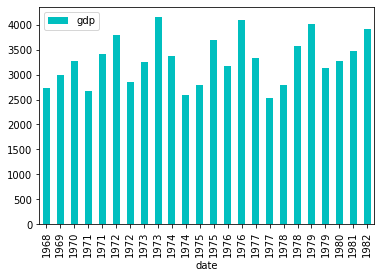

In [75]:
# Plot a bar chart of gdp_recession
import matplotlib.pyplot as plt
gdp_recession.plot(kind='bar', y='gdp', x='date', color='c', rot=90)
plt.show()

## Subsetting rows with .query()

In [76]:
gdp = pd.read_csv(gdp_url)
pop  = pd.read_csv(pop_url)

In [77]:
# Merge gdp and pop on year and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method = 'ffill')

In [78]:
# Add a column named gdp_per_captia to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']

In [79]:
# Pivot data so gdp_per_captia, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')
gdp_pivot

Country Name,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (IDA & IBRD countries),East Asia & Pacific (excluding high income),Ecuador,"Egypt, Arab Rep.",El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Euro area,Europe & Central Asia,Europe & Central Asia (IDA & IBRD countries),Europe & Central Asia (excluding high income),European Union,Faroe Islands,Fiji,Finland,Fragile and conflict affected situations,France,French Polynesia,Gabon,...,St. Lucia,St. Martin (French part),St. Vincent and the Grenadines,Sub-Saharan Africa,Sub-Saharan Africa (IDA & IBRD countries),Sub-Saharan Africa (excluding high income),Sudan,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,4550.450211,300915.248316,1.973084e+07,210771.184756,3.184150e+06,2.972925e+06,662749.385743,3.168067e+06,1.212222e+06,9.151261e+07,1.223086e+07,1.299185e+06,2.452952e+06,1.619642e+07,1.919947e+08,1.403613e+06,4679.110759,6166.248952,7009.559480,6921.895752,906541.465235,164427.222479,2.200594e+06,1.442098e+07,4.292219e+06,1.022039e+07,1.277961e+07,155273.911340,40482.344568,15313.731330,30849.106991,34124.311445,26984.400162,2.846070e+08,1.582684e+07,2.537257e+06,31646.807250,209268.363925,5.107129e+07,8.378711e+06,...,2.855456e+07,1.322686e+08,4.591862e+07,5720.110922,5720.110922,5720.701868,143896.891861,9.394498e+06,530054.725219,635268.729643,232693.423143,660377.283294,112092.661150,73977.497264,4.545785e+06,774084.160856,4.780374e+07,3.742748e+06,467400.653901,68728.425412,977140.135473,1.522021e+08,4.720722e+08,153290.193676,108368.086818,581394.968040,79197.194230,48466.976201,8199.573482,6.100751e+06,717520.236395,8.676184e+07,720609.818445,232973.141456,1.891332e+08,5.412897e+06,2960.314333,885088.677947,1.506256e+06,1.613998e+06
2011,5618.132175,298013.063021,1.925955e+07,203852.427692,3.096401e+06,2.937178e+06,647126.504287,3.179024e+06,1.211053e+06,9.022151e+07,1.209797e+07,1.296502e+06,2.442873e+06,1.594075e+07,1.918918e+08,1.386723e+06,4610.048204,6125.203541,6959.526169,6872.669774,892699.058370,160988.060346,2.191136e+06,1.378949e+07,4.234075e+06,1.025147e+07,1.269384e+07,150967.506330,40570.671050,15275.301479,30693.576165,33934.582981,27000.081074,2.845535e+08,1.576028e+07,2.525522e+06,30912.363898,208258.663008,5.083415e+07,8.077833e+06,...,2.831723e+07,1.327490e+08,4.589276e+07,5566.251954,5566.251954,5566.797017,140621.353839,9.288332e+06,526067.091513,628244.433609,235778.969619,645782.857054,108836.363132,73623.209750,4.465630e+06,753632.952862,4.799946e+07,3.720253e+06,462760.708554,67683.258981,960734.120139,1.489325e+08,4.674993e+08,148487.977642,108758.349542,555610.137595,78580.541008,49883.174629,8138.399810,6.083260e+06,698518.033770,8.445847e+07,709423.920748,230603.578573,1.892485e+08,5.277923e+06,2926.051834,860822.188287,1.461443e+06,1.589390e+06
2012,6316.918327,295337.042152,1.879921e+07,197161.007255,3.017207e+06,2.902773e+06,631553.407340,3.188756e+06,1.208855e+06,8.947583e+07,1.198912e+07,1.294689e+06,2.433698e+06,1.567519e+07,1.917593e+08,1.370287e+06,4543.862588,6083.728580,6909.249312,6823.200260,879417.752319,157461.782985,2.181527e+06,1.319659e+07,NaN,1.028823e+07,1.260850e+07,146755.575570,40481.415481,15213.416314,30539.282110,33744.983263,26941.796707,2.844345e+08,1.573077e+07,2.513534e+06,30198.383197,207253.115829,5.058848e+07,7.777528e+06,...,2.814057e+07,1.343165e+08,4.584239e+07,5416.556499,

In [80]:
gdp_pivot = gdp_pivot.loc[:, ['China', 'United States']]

In [81]:
# Select year equal to or greater than 2016
recent_gdp_pop = gdp_pivot.query('Year >= 2016')

recent_gdp_pop

Country Name,China,United States
Year,,
2016,8078.757349,57904.238377
2017,8759.047746,59927.948739
2018,9770.881650,62641.014570
